In [1]:
# !pip install imutils

[Image Processing with Python](https://datacarpentry.org/image-processing/aio/index.html)

**Topic**

Image Masking

Image Color 

Channels Merging and Splitting

Gray scale Histograms 

Color Histograms 

Histogram Equalization 

Image Blurring

Image Threshold

Image Gradient Detection

Canny Edge Detection 

Image Contours

Image Transformation 

Rotation

Resizing

Flipping

Croppinng 

Operations

Translation

Image Bitwise Logical Operations

**What is OpenCV?**

OpenCV is an open-source software library for computer vision and machine learning. The OpenCV full form is Open Source Computer Vision Library. It was created to provide a shared infrastructure for applications for computer vision and to speed up the use of machine perception in consumer products. OpenCV, as a BSD-licensed software, makes it simple for companies to use and change the code. There are some predefined packages and libraries that make our life simple and OpenCV is one of them.

**What is Computer Vision?**

The term Computer Vision (CV) is used and heard very often in artificial intelligence (AI) and deep learning (DL) applications. The term essentially means giving a computer the ability to see the world as we humans do.

Computer Vision is a field of study which enables computers to replicate the human visual system. As already mentioned above, It’s a subset of artificial intelligence which collects information from digital images or videos and processes them to define the attributes. The entire process involves image acquiring, screening, analysing, identifying and extracting information. This extensive processing helps computers to understand any visual content and act on it accordingly.

Computer vision projects translate digital visual content into explicit descriptions to gather multi-dimensional data. This data is then turned into a computer-readable language to aid the decision-making process. The main objective of this branch of artificial intelligence is to teach machines to collect information from pixels.

**Import Library**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import imutils
import cv2

import warnings
warnings.filterwarnings('ignore')

**Imread function in OpenCV**

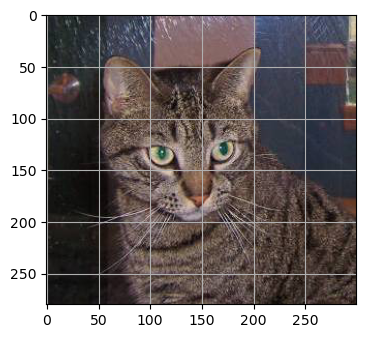

In [3]:
plt.figure(figsize=(4, 4))
imagedata = plt.imread("/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1.jpg")
plt.imshow(imagedata)
plt.grid(True)
plt.show()

**Image Shape**

To know the size of the image use the index position to get the height, width, and number of channels.

In [4]:
imagedata.shape

(280, 300, 3)

In [5]:
len(imagedata.shape)

3

In [6]:
#Ch_last
#CH -1st

**Image Show Function**

In [7]:
def catimageShow(imageTitle, image):
    if image.shape[2] == 3:
        imageVariable = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Here we will convert the image to RGB format by using cvtColor()    
#     if image.shape[2]==1:
#         imageVariable = cv2.cvtColor(image, cv2.COLOR_RGB2BGRA) 
    plt.figure(figsize=(4, 4))
    plt.imshow(imageVariable)
    plt.grid(True)
    plt.title(imageTitle)
    plt.show()

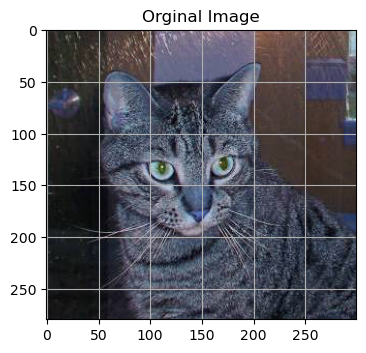

In [8]:
catimageShow("Orginal Image",imagedata)

In [9]:
imagedata.shape

(280, 300, 3)

In [10]:
cv2.split(imagedata) ##Here as we convert it into RGB so the matrices sequences are R, G, B

(array([[ 39,  39,  40, ..., 207, 202, 201],
        [ 40,  40,  40, ..., 203, 199, 197],
        [ 40,  40,  40, ..., 199, 198, 198],
        ...,
        [ 32,  30,  26, ...,  36,  43,  57],
        [ 32,  30,  26, ...,  42,  46,  55],
        [ 32,  29,  25, ...,  51,  44,  40]], dtype=uint8),
 array([[ 44,  44,  44, ..., 204, 199, 199],
        [ 45,  45,  44, ..., 200, 196, 195],
        [ 45,  45,  44, ..., 196, 195, 195],
        ...,
        [ 30,  28,  24, ...,  23,  30,  46],
        [ 30,  28,  24, ...,  29,  33,  45],
        [ 30,  27,  23, ...,  38,  31,  30]], dtype=uint8),
 array([[ 40,  40,  43, ..., 171, 164, 161],
        [ 41,  41,  43, ..., 169, 161, 157],
        [ 41,  41,  43, ..., 165, 162, 160],
        ...,
        [ 31,  29,  25, ...,  17,  24,  40],
        [ 31,  29,  25, ...,  21,  25,  36],
        [ 31,  28,  24, ...,  30,  23,  21]], dtype=uint8))

In [11]:
#mask = shedow 

**Image Histogram**

A histogram represents the distribution of pixel intensities (whether color or grayscale) in an image. It can be visualized as a graph (or plot) that gives a high-level intuition of the intensity (pixel value) distribution. We are going to assume a RGB color space in this example, so these pixel values will be in the range of 0 to 255.

When plotting the histogram, the x-axis serves as our “bins.” If we construct a histogram with 256 bins, then we are effectively counting the number of times each pixel value occurs.

In contrast, if we use only 2 (equally spaced) bins, then we are counting the number of times a pixel is in the range [0, 128] or [128, 255].

**Using OpenCV to compute histograms with the cv2.calcHist function**

**cv2.calcHist(images, channels, mask, histSize, ranges)**

**images:** This is the image that we want to compute a histogram for. Wrap it as a list: [myImage] .

**channels:** A list of indexes, where we specify the index of the channel we want to compute a histogram for. To compute a histogram of a grayscale image, the list would be [0]. To compute a histogram for all three red, green, and blue channels, the channels list would be [0, 1, 2].

**mask:** Remember learning about masks in my Image Masking with OpenCV guide? Well, here we can supply a mask. If a mask is provided, a histogram will be computed for masked pixels only. If we do not have a mask or do not want to apply one, we can just provide a value of None.

**histSize:** This is the number of bins we want to use when computing a histogram. Again, this is a list, one for each channel we are computing a histogram for. The bin sizes do not all have to be the same. Here is an example of 32 bins for each channel: [32, 32, 32].

**ranges:** The range of possible pixel values. Normally, this is [0, 256] (that is not a typo — the ending range of the cv2.calcHist function is non-inclusive so you’ll want to provide a value of 256 rather than 255) for each channel, but if you are using a color space other than RGB [such as HSV], the ranges might be different.)

In [12]:
def imageHistogram(image , imageTitle, mask = None):
    color_Channel = cv2.split(image)
    color_com = ('b','g','r')
    plt.figure(figsize=(4,2))
    plt.title(imageTitle)#(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)
    plt.xlabel("Bins") #plt.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
    plt.ylabel("Pixle Information") # plt.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
    
    for (color_Channel,color_com) in zip(color_Channel,color_com):
        histogram = cv2.calcHist([color_Channel], [0], mask, [256],[0,256]) #calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
        plt.plot(histogram, color = color_com) #plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
        plt.xlim([0,256])
        plt.show()

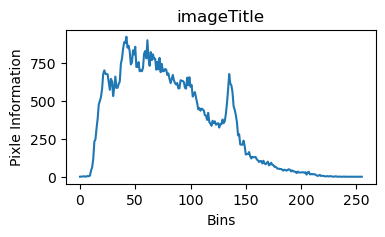

In [13]:
image_argument = {"Image":"/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1.jpg"}
image = cv2.imread(image_argument['Image']) #imread(filename[, flags])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #cvtColor(src, code[, dst[, dstCn]])
sampleHistio = cv2.calcHist([image],[0],None,[256],[0,256]) #calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
plt.figure(figsize=(4,2))
plt.title("imageTitle")#(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)
plt.xlabel("Bins") #plt.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
plt.ylabel("Pixle Information") # plt.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
plt.plot(sampleHistio)
plt.show()

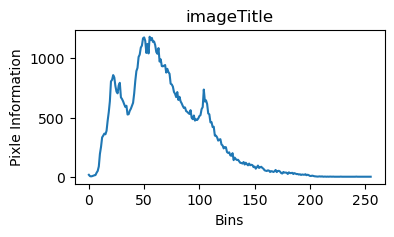

In [14]:
image_argument = {"Image":"/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1.jpg"}
image = cv2.imread(image_argument['Image']) #imread(filename[, flags])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #cvtColor(src, code[, dst[, dstCn]])
sampleHistio = cv2.calcHist([image],[1],None,[256],[0,256]) #calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
plt.figure(figsize=(4,2))
plt.title("imageTitle")#(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)
plt.xlabel("Bins") #plt.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
plt.ylabel("Pixle Information") # plt.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
plt.plot(sampleHistio)
plt.show()

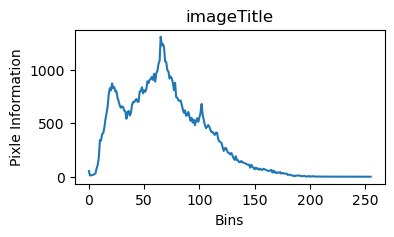

In [15]:
image_argument = {"Image":"/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1.jpg"}
image = cv2.imread(image_argument['Image']) #imread(filename[, flags])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #cvtColor(src, code[, dst[, dstCn]])
sampleHistio = cv2.calcHist([image],[2],None,[256],[0,256]) #calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
plt.figure(figsize=(4,2))
plt.title("imageTitle")#(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)
plt.xlabel("Bins") #plt.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
plt.ylabel("Pixle Information") # plt.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
plt.plot(sampleHistio)
plt.show()

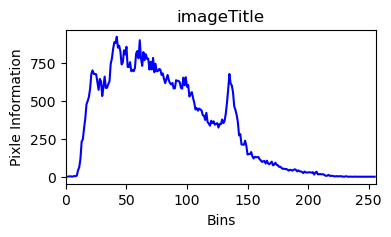

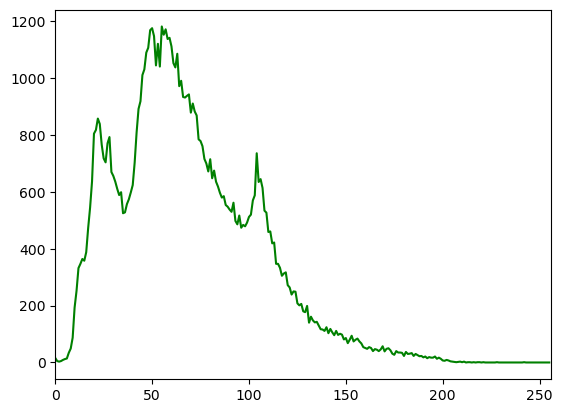

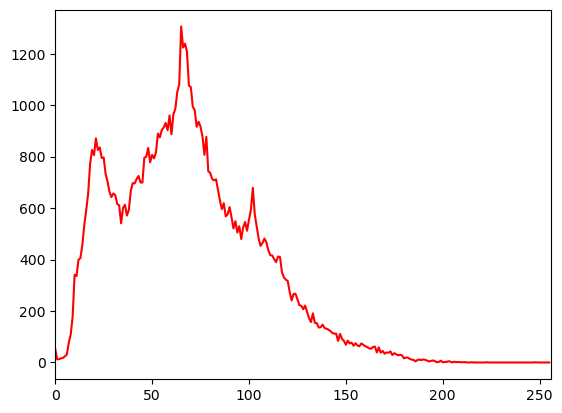

In [16]:
color_Channel = cv2.split(image)
color_com = ('b','g','r')
plt.figure(figsize=(4,2))
plt.title("imageTitle")#(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)
plt.xlabel("Bins") #plt.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
plt.ylabel("Pixle Information") # plt.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
    
for (color_Channel,color_com) in zip(color_Channel,color_com):
    histogram = cv2.calcHist([color_Channel], [0], None, [256],[0,256]) #calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
    plt.plot(histogram, color = color_com) #plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    plt.xlim([0,256])
    plt.show()

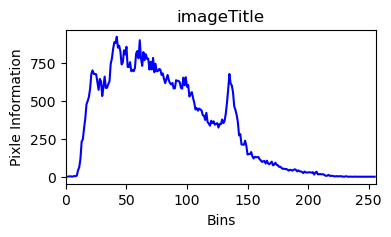

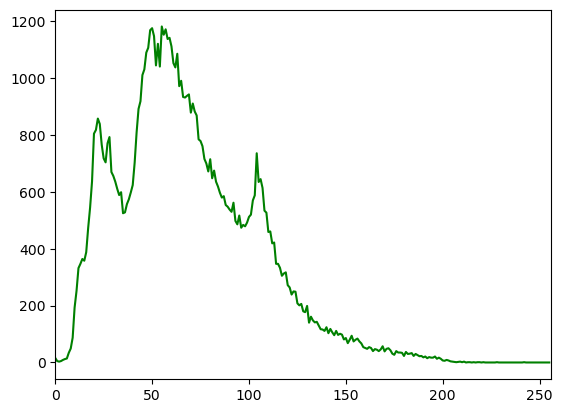

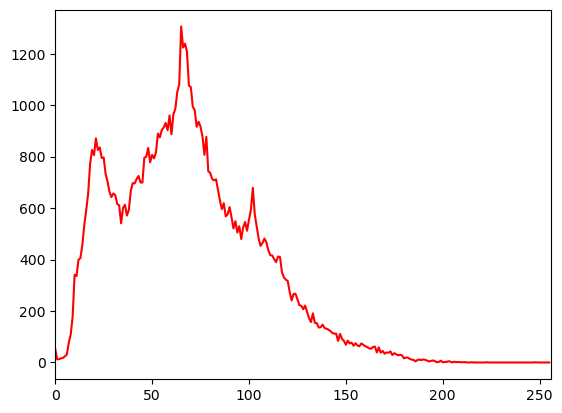

In [17]:
imageHistogram(image,"imageTitle",None)

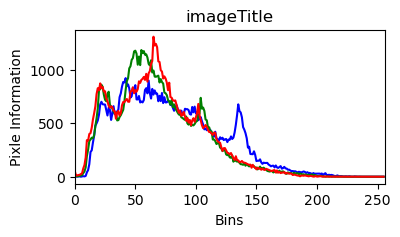

In [18]:
color_Channel = cv2.split(image)
color_com = ('b','g','r')
plt.figure(figsize=(4,2))
plt.title("imageTitle")#(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)
plt.xlabel("Bins") #plt.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
plt.ylabel("Pixle Information") # plt.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
    
for (color_Channel,color_com) in zip(color_Channel,color_com):
    histogram = cv2.calcHist([color_Channel], [0], None, [256],[0,256]) #calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
    plt.plot(histogram, color = color_com) #plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    plt.xlim([0,256])
#     plt.show()

In [19]:
cv2.split(image)

(array([[ 39,  39,  40, ..., 207, 202, 201],
        [ 40,  40,  40, ..., 203, 199, 197],
        [ 40,  40,  40, ..., 199, 199, 199],
        ...,
        [ 32,  30,  26, ...,  36,  41,  57],
        [ 32,  30,  26, ...,  42,  44,  55],
        [ 32,  29,  25, ...,  51,  42,  40]], dtype=uint8),
 array([[ 44,  44,  44, ..., 204, 199, 198],
        [ 45,  45,  44, ..., 200, 196, 194],
        [ 45,  45,  44, ..., 195, 194, 194],
        ...,
        [ 30,  28,  24, ...,  23,  30,  46],
        [ 30,  28,  24, ...,  29,  34,  45],
        [ 30,  27,  23, ...,  38,  32,  30]], dtype=uint8),
 array([[ 40,  40,  43, ..., 173, 166, 163],
        [ 41,  41,  43, ..., 169, 163, 159],
        [ 41,  41,  43, ..., 166, 164, 162],
        ...,
        [ 31,  29,  25, ...,  17,  24,  40],
        [ 31,  29,  25, ...,  21,  25,  36],
        [ 31,  28,  24, ...,  30,  23,  21]], dtype=uint8))

In [20]:
cv2.split(image[0])

(array([[ 39,  44,  40],
        [ 39,  44,  40],
        [ 40,  44,  43],
        [ 41,  45,  44],
        [ 41,  45,  48],
        [ 41,  45,  48],
        [ 40,  43,  50],
        [ 40,  43,  50],
        [ 68,  71,  78],
        [ 57,  60,  65],
        [ 38,  41,  46],
        [ 30,  34,  35],
        [ 41,  45,  46],
        [ 56,  60,  59],
        [ 52,  57,  53],
        [ 36,  42,  38],
        [ 44,  50,  50],
        [ 37,  46,  45],
        [ 40,  49,  48],
        [ 40,  49,  48],
        [ 30,  39,  38],
        [ 35,  44,  43],
        [ 39,  48,  47],
        [ 32,  41,  40],
        [ 38,  47,  46],
        [ 32,  41,  40],
        [ 37,  46,  45],
        [ 25,  34,  33],
        [ 57,  66,  65],
        [ 40,  49,  48],
        [ 28,  37,  36],
        [ 39,  48,  47],
        [ 31,  35,  36],
        [ 33,  37,  38],
        [ 33,  37,  38],
        [ 31,  35,  36],
        [ 32,  36,  37],
        [ 36,  40,  41],
        [ 39,  43,  46],
        [ 39,  43,  46],


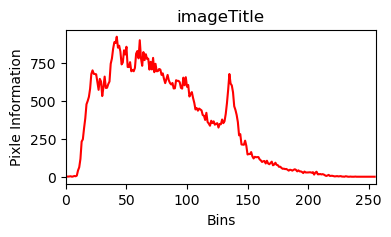

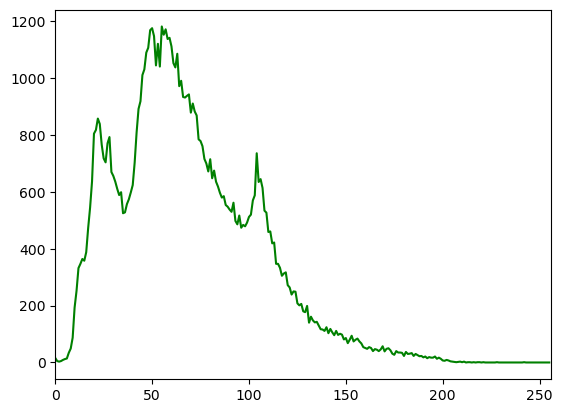

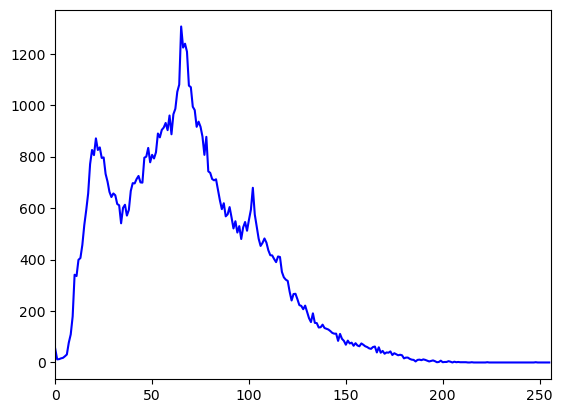

In [21]:
color_Channel = cv2.split(image)
color_com = ('r','g','b')
plt.figure(figsize=(4,2))
plt.title("imageTitle")#(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)
plt.xlabel("Bins") #plt.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
plt.ylabel("Pixle Information") # plt.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)
    
for (color_Channel,color_com) in zip(color_Channel,color_com):
    histogram = cv2.calcHist([color_Channel], [0], None, [256],[0,256]) #calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
    plt.plot(histogram, color = color_com) #plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    plt.xlim([0,256])
    plt.show()

Image Shape: (32, 32) with 1024


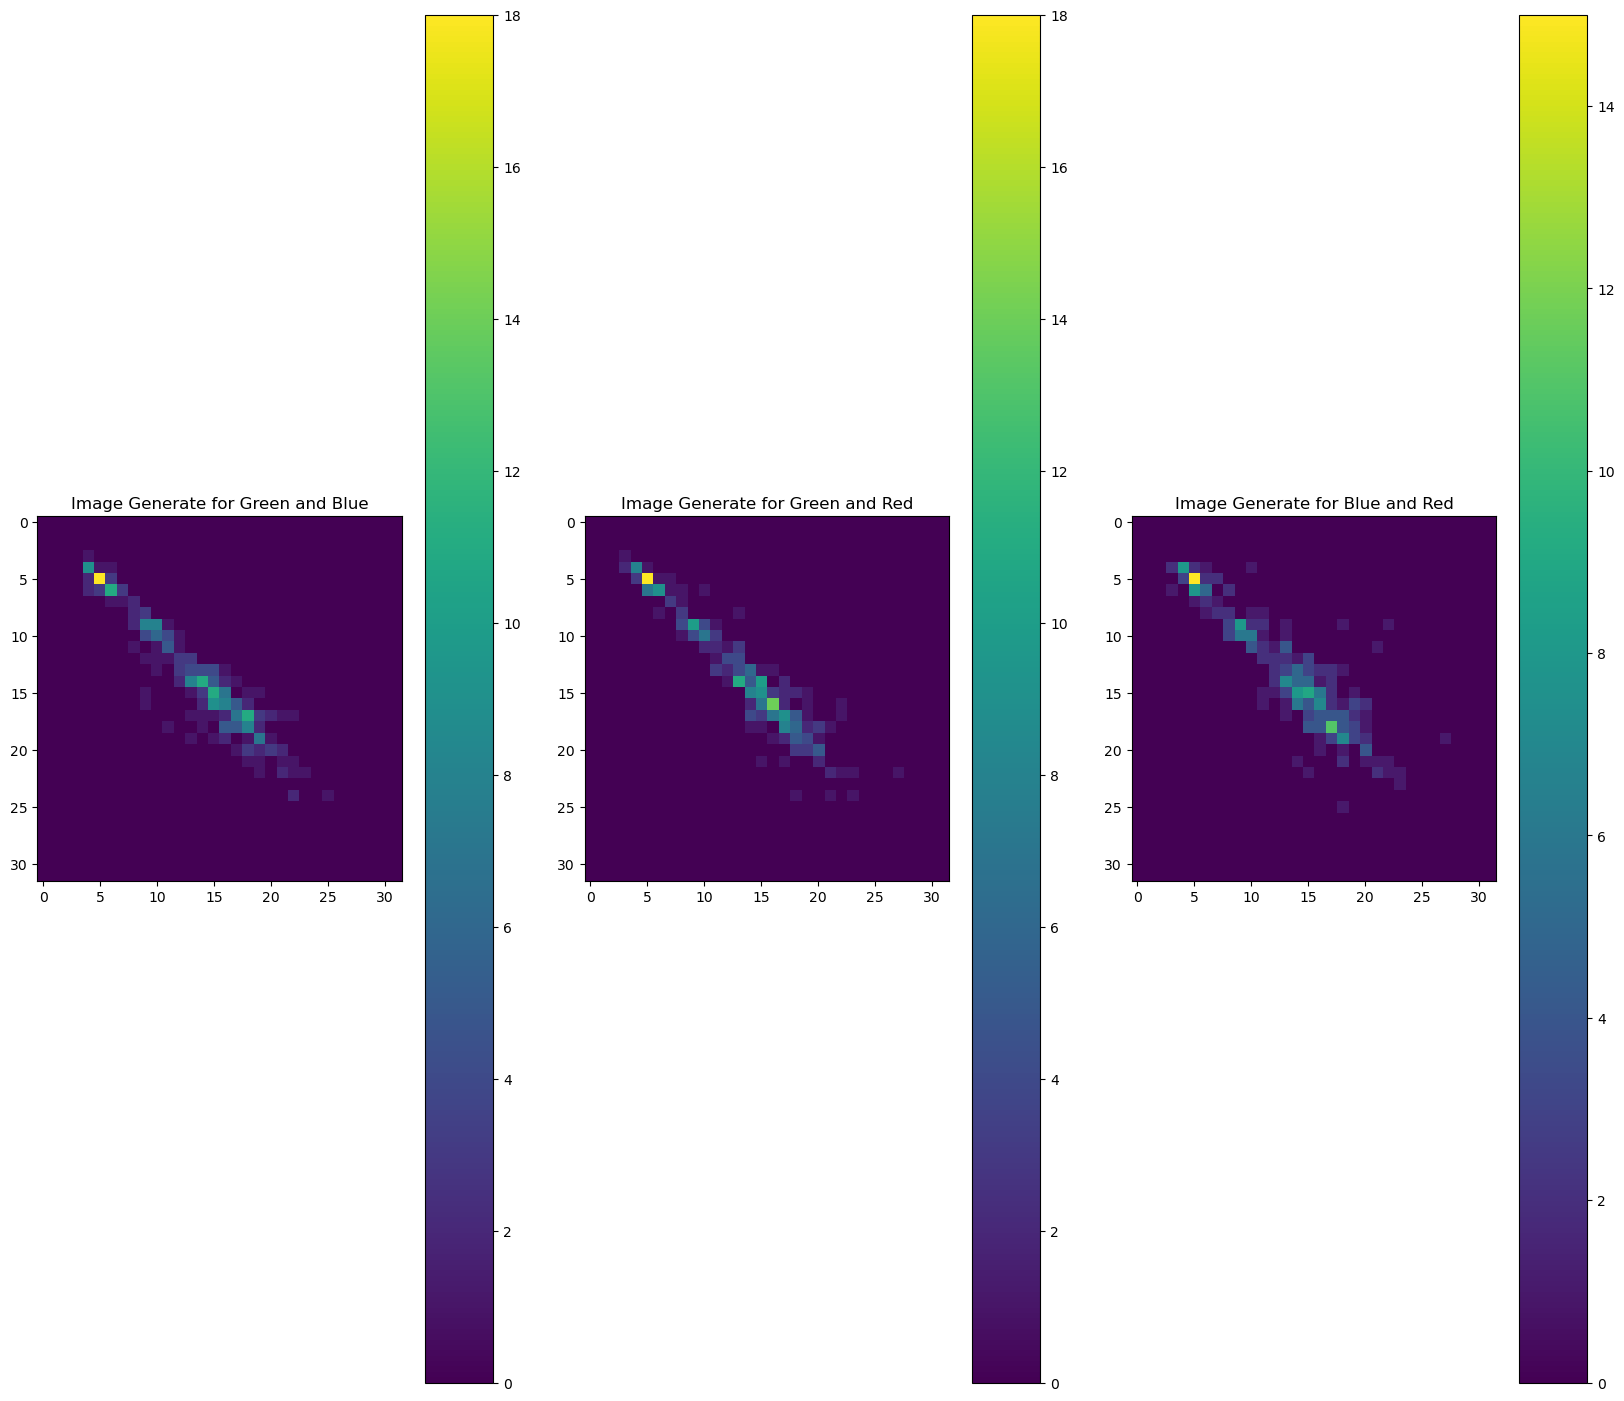

In [22]:
# Interpolation is the way the extra pixels in the new image is calculated.

color = ["B", "G", "R"]
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(131)
hist = cv2.calcHist([color_Channel[1], color_Channel[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("Image Generate for Green and Blue")
plt.colorbar(p)


ax = fig.add_subplot(132)
hist = cv2.calcHist([color_Channel[1], color_Channel[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("Image Generate for Green and Red")
plt.colorbar(p)



ax = fig.add_subplot(133)
hist = cv2.calcHist([color_Channel[0], color_Channel[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("Image Generate for Blue and Red")
plt.colorbar(p)

print("Image Shape: {} with {}".format(hist.shape, hist.flatten().shape[0]))

In [23]:
a = 4;
b = 5;
print("A is {} and B is {}".format(b,a))

A is 5 and B is 4


In [24]:
def sum(a,b):
    return a,b;

sum(2,3)

(2, 3)

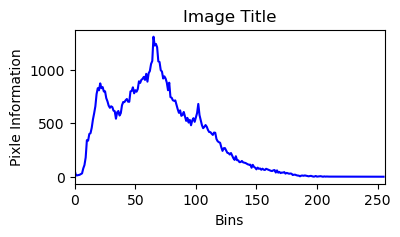

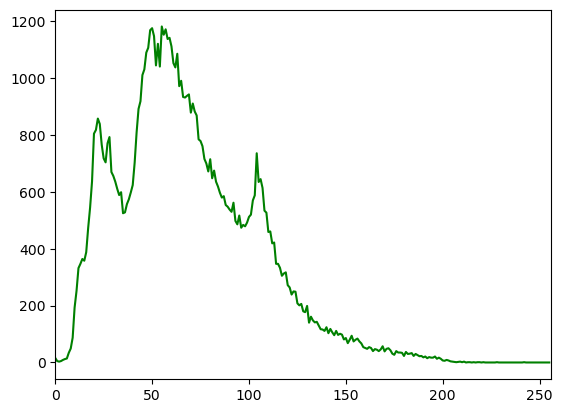

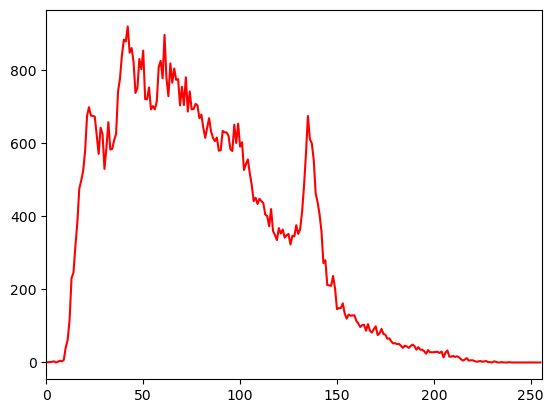

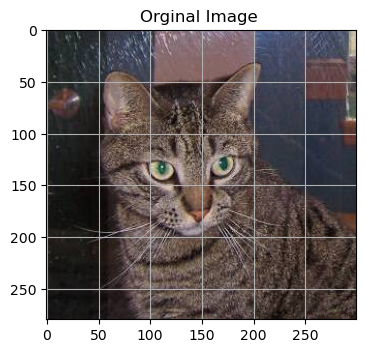

In [25]:
image = cv2.imread("/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1.jpg")
imageHistogram(image,"Image Title")
catimageShow("Orginal Image ",image)

In [26]:
image.shape[:2]

(280, 300)

In [27]:
def catimageShow(imageTitle, image):
    imageVariable = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(4, 4))
    plt.imshow(imageVariable)
    plt.grid(True)
    plt.title(imageTitle)
    plt.show()

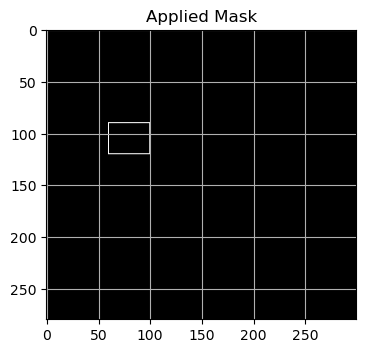

In [28]:
#masking

mask = np.zeros(image.shape[:2],dtype = "uint8") #zeros(shape, dtype=float, order='C', *, like=None)
cv2.rectangle(mask, (60,90), (100,120),255) #rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) 
catimageShow("Applied Mask",mask) 

**How to mask an image in OpenCV Python?**

We can apply a mask to an image by computing the cv2.bitwise_and() between the mask and the image. To track a color, we define a mask in HSV color space using cv2.inRange() passing lower and upper limits of color values in HSV.

To track a part of the image we can define a mask using np.zeros() and slicing the entries with white (255) for the region in the input image to examine. Follow the given steps to mask an image −

The first step is to import required libraries. The required Python libraries are OpenCV, and NumPy. Make sure you have already installed them.

Next read the input image using cv2.imread() method. Convert the image BGR to HSV to track a color in the input image. To track a part of the image leave the image in BGR format.

Define a mask using cv2.inRange() to track a particular color in the image. Pass the lower and upper limits of color in HSV format. If you want to track the rectangular part of the input image, define a rectangular image (mask) with cv2.zeros(). Fill the entries of the mask with 255 to track the area in the original image.

Apply bitwise AND operation between the mask and the input image using cv2.bitwise_and().

Now display the mask and masked image.

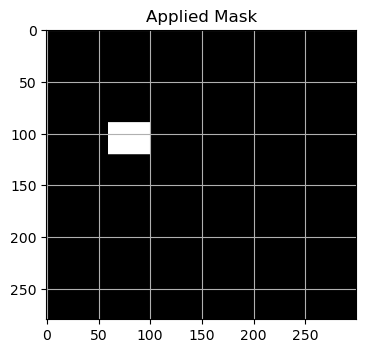

In [29]:
#masking

mask = np.zeros(image.shape[:2],dtype = "uint8") #zeros(shape, dtype=float, order='C', *, like=None)
cv2.rectangle(mask, (60,90), (100,120),255,-1) #rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) 
catimageShow("Applied Mask",mask) 

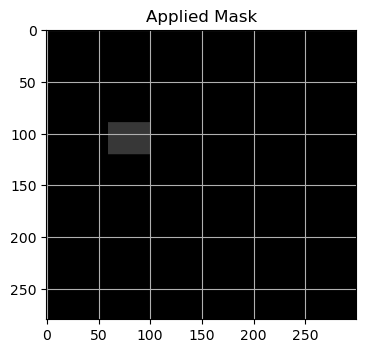

In [30]:
#masking

mask = np.zeros(image.shape[:2],dtype = "uint8") #zeros(shape, dtype=float, order='C', *, like=None)
cv2.rectangle(mask, (60,90), (100,120),55,-1) #rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) 
catimageShow("Applied Mask",mask) 

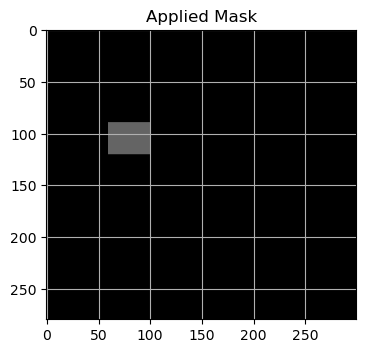

In [31]:
#masking

mask = np.zeros(image.shape[:2],dtype = "uint8") #zeros(shape, dtype=float, order='C', *, like=None)
cv2.rectangle(mask, (60,90), (100,120),100,-1) #rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) 
catimageShow("Applied Mask",mask) 

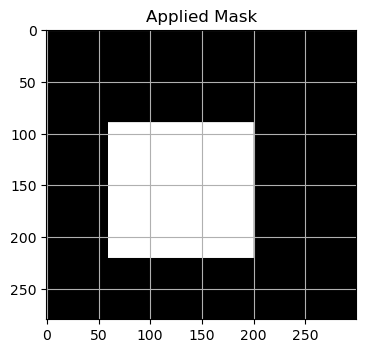

In [32]:
#masking

mask = np.zeros(image.shape[:2],dtype = "uint8") #zeros(shape, dtype=float, order='C', *, like=None)
cv2.rectangle(mask, (60,90), (200,220),255,-1) #rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) 
catimageShow("Applied Mask",mask) 

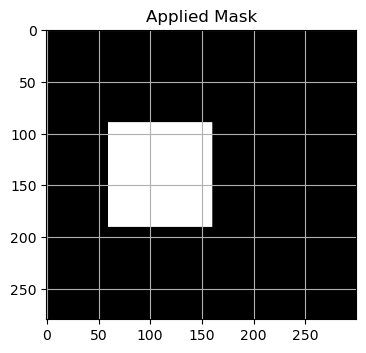

In [33]:
#masking

mask = np.zeros(image.shape[:2],dtype = "uint8") #zeros(shape, dtype=float, order='C', *, like=None)
cv2.rectangle(mask, (60,90), (160,190),255,-1) #rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) 
catimageShow("Applied Mask",mask) 

**Blur Image - Gaussian Blur**

In this method, instead of a box filter, a Gaussian kernel is used. It is done with the function, cv.GaussianBlur(). We should specify the width and height of the kernel which should be positive and odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as the same as sigmaX. If both are given as zeros, they are calculated from the kernel size. Gaussian blurring is highly effective in removing Gaussian noise from an image.

If you want, you can create a Gaussian kernel with the function, cv.getGaussianKernel().

The above code can be modified for Gaussian blurring:

blur = cv.GaussianBlur(img,(5,5),0)

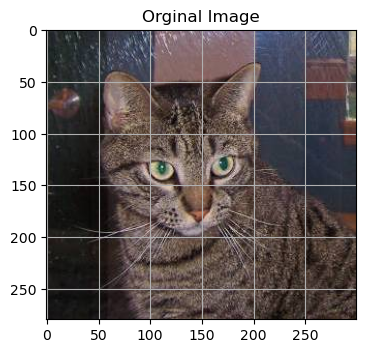

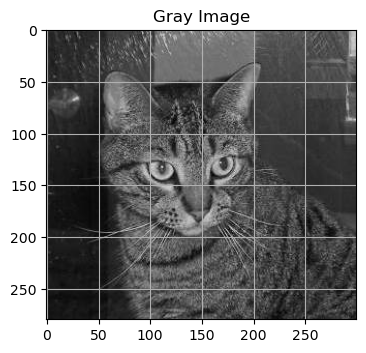

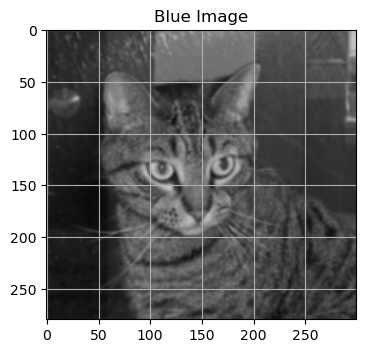

In [34]:
#blure image
    
image = cv2.imread("/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1.jpg")
grayImage = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) #cvtColor(src, code[, dst[, dstCn]]) -> dst
blurImage = cv2.GaussianBlur(grayImage, (5,5),0) #GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])
catimageShow("Orginal Image",image)
catimageShow("Gray Image",grayImage)
catimageShow("Blue Image",blurImage)

**Median Blurring**

Here, the function cv.medianBlur() takes the median of all the pixels under the kernel area and the central element is replaced with this median value. This is highly effective against salt-and-pepper noise in an image. Interestingly, in the above filters, the central element is a newly calculated value which may be a pixel value in the image or a new value. But in median blurring, the central element is always replaced by some pixel value in the image. It reduces the noise effectively. Its kernel size should be a positive odd integer.

In this demo, I added a 50% noise to our original image and applied median blurring. Check the result:

median = cv.medianBlur(img,5)

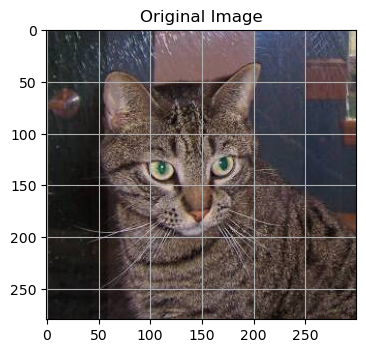

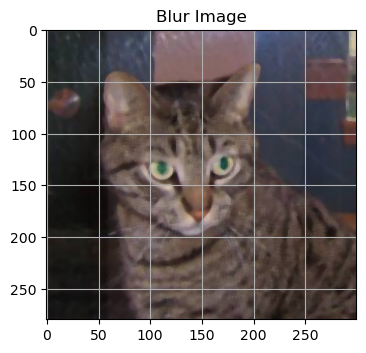

In [35]:
imageData = cv2.imread("/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1.jpg")
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
bilateralImage = cv2.medianBlur(imageData,5)
catimageShow("Original Image", image)
catimageShow("Blur Image", bilateralImage)

**Bilateral Filter**

cv.bilateralFilter() is highly effective in noise removal while keeping edges sharp. But the operation is slower compared to other filters. We already saw that a Gaussian filter takes the neighbourhood around the pixel and finds its Gaussian weighted average. This Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It doesn't consider whether pixels have almost the same intensity. It doesn't consider whether a pixel is an edge pixel or not. So it blurs the edges also, which we don't want to do.

Bilateral filtering also takes a Gaussian filter in space, but one more Gaussian filter which is a function of pixel difference. The Gaussian function of space makes sure that only nearby pixels are considered for blurring, while the Gaussian function of intensity difference makes sure that only those pixels with similar intensities to the central pixel are considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.

The below sample shows use of a bilateral filter (For details on arguments, visit docs).

blur = cv.bilateralFilter(img,9,75,75)

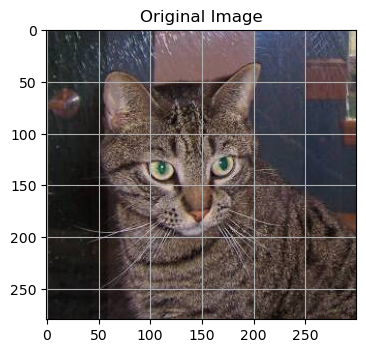

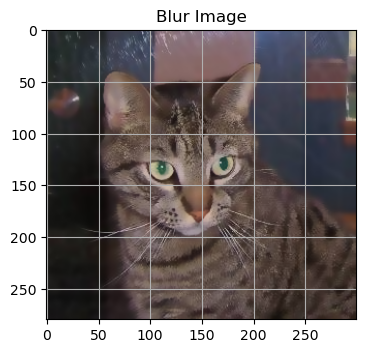

In [36]:
imageData = cv2.imread("/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1.jpg")
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
bilateralImage = cv2.bilateralFilter(imageData,9,75,75)
catimageShow("Original Image", image)
catimageShow("Blur Image", bilateralImage)

**Canny Edge Detection Image Blur**

OpenCV puts all the above in single function, cv.Canny(). We will see how to use it. First argument is our input image. Second and third arguments are our minVal and maxVal respectively. Fourth argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3. Last argument is L2gradient which specifies the equation for finding gradient magnitude. If it is True, it uses the equation mentioned above which is more accurate, otherwise it uses this function: Edge_Gradient(G)=|Gx|+|Gy|. By default, it is False.

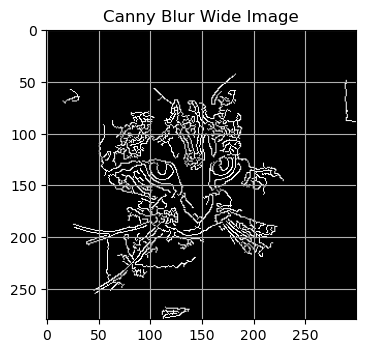

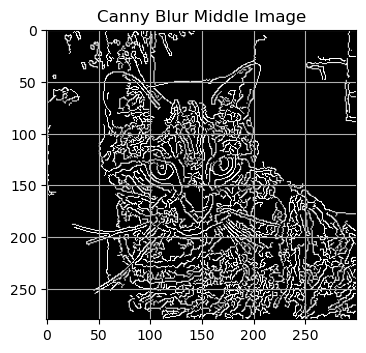

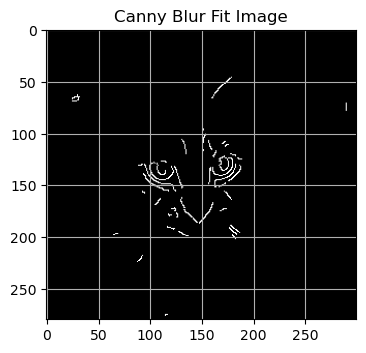

In [37]:
cannyBlurWide = cv2.Canny(blurImage,20,250) #Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]])
cannyBlurMiddle = cv2.Canny(blurImage,15,120) #Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]])
cannyBlurFit = cv2.Canny(blurImage,200,250) #Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]])

catimageShow("Canny Blur Wide Image",cannyBlurWide)
catimageShow("Canny Blur Middle Image",cannyBlurMiddle)
catimageShow("Canny Blur Fit Image",cannyBlurFit)